# **CMPE 257 Project Milestone 2**
## **Team 8**

**Installing and importing all required libraries**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


**Importing data from CSV file using read_csv()**

In [4]:
covid = pd.read_csv("WHO-COVID-19-global-data.csv")
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


**Preprocessing the data to extract New cases and Cumulative cases for a specific country**

In [5]:
india = covid.loc[covid['Country'] == 'India']

In [6]:
india = india[['Date_reported', 'New_cases', 'Cumulative_cases']].reset_index()
india = india[['Date_reported', 'New_cases', 'Cumulative_cases']]
india

,Date_reported,New_cases,Cumulative_cases
0,2020-01-03,0,0
1,2020-01-04,0,0
2,2020-01-05,0,0
3,2020-01-06,0,0
4,2020-01-07,0,0
...,...,...,...
1060,2022-11-28,291,44671853
1061,2022-11-29,215,44672068
1062,2022-11-30,279,44672347
1063,2022-12-01,291,44672638


**Dividing the data into training and testing data (approx 80:20)**

In [7]:
newC = india['New_cases'][:800]
cumC = india['Cumulative_cases'][:800]

newCtest = india['New_cases'][800:]

cumCtest = india['Cumulative_cases'][800:].reset_index()
cumCtest = cumCtest['Cumulative_cases']

miss1 = india['Cumulative_cases']
miss1

df = pd.DataFrame({'date':pd.date_range('2020-01-03', periods=len(miss1)), 'cases':miss1})
df['date'] = df['date'].astype(int)


**Dividing the data in frames and appending in a list for time series forecasting**

In [8]:
from numpy import array

X, y = list(), list()
for i in range(0,len(cumC),1):
  # find the end of this pattern
  end_ix = i + 3
  # check if we are beyond the sequence
  if end_ix > len(cumC)-1:
    break
  # gather input and output parts of the pattern
  seq_x, seq_y = cumC[i:end_ix], cumC[end_ix]
  X.append(seq_x)
  y.append(seq_y)



X = array(X) 
y = array(y)

# for i in range(len(X)):
# 	print(X[i], y[i])
X

array([[       0,        0,        0],
       [       0,        0,        0],
       [       0,        0,        0],
       ...,
       [42967315, 42971308, 42975883],
       [42971308, 42975883, 42980067],
       [42975883, 42980067, 42984261]])

In [9]:
from numpy import array

Xtest, ytest = list(), list()
for i in range(len(cumCtest)):
  # find the end of this pattern
  end_ix = i + 3
  # check if we are beyond the sequence
  if end_ix > len(cumCtest)-1:
    break
  # gather input and output parts of the pattern
  seq_x, seq_y = cumCtest[i:end_ix], cumCtest[end_ix]
  Xtest.append(seq_x)
  ytest.append(seq_y)



Xtest = array(Xtest) 
ytest = array(ytest)
actual = ytest
# for i in range(len(X)):
	# print(X[i], y[i])
 
# print(len(actual))
# actual

# **XGBoost**

**Creating the XGBoodt model and printing the predicted and expected values along with a plot showing the results**

[[1.5780096e+18 0.0000000e+00 1.5780960e+18 ... 0.0000000e+00
  1.5785280e+18 0.0000000e+00]
 [1.5780960e+18 0.0000000e+00 1.5781824e+18 ... 0.0000000e+00
  1.5786144e+18 0.0000000e+00]
 [1.5781824e+18 0.0000000e+00 1.5782688e+18 ... 0.0000000e+00
  1.5787008e+18 0.0000000e+00]
 ...
 [1.6692480e+18 4.4670483e+07 1.6693344e+18 ... 4.4672068e+07
  1.6697664e+18 4.4672347e+07]
 [1.6693344e+18 4.4670830e+07 1.6694208e+18 ... 4.4672347e+07
  1.6698528e+18 4.4672638e+07]
 [1.6694208e+18 4.4671219e+07 1.6695072e+18 ... 4.4672638e+07
  1.6699392e+18 4.4672913e+07]]
>expected=43042097.0, predicted=43040916.0
>expected=43044280.0, predicted=43042068.0
>expected=43045527.0, predicted=43044252.0
>expected=43047594.0, predicted=43045504.0
>expected=43049974.0, predicted=43047564.0
>expected=43052425.0, predicted=43049952.0
>expected=43054952.0, predicted=43052400.0
>expected=43057545.0, predicted=43054928.0
>expected=43060086.0, predicted=43057512.0
>expected=43062569.0, predicted=43060060.0
>expec

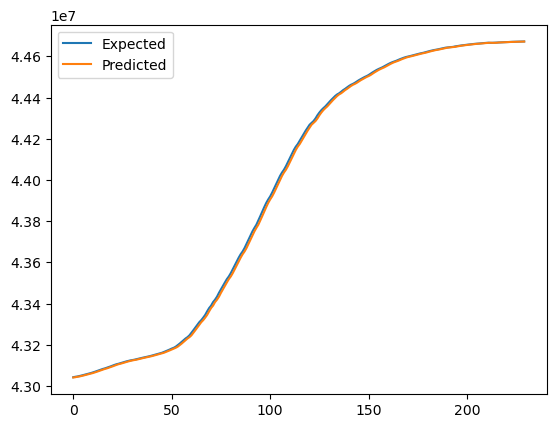

In [10]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]
 
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions
 
# load the dataset
data = series_to_supervised(df, n_in=6)
print(data)
# evaluate
mae, y, yhat = walk_forward_validation(data, 230)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()